# Notebook Setup

## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from skimage import data

## Drive Mounting & Base Path for Images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
basePath = "/content/drive/My Drive/Colab Notebooks/Computer Vision/"

## Plot Parameters

In [4]:
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     'xtick.color' : "white",
                     'ytick.color' : "white"})

# Turning On/Off Channels

(-0.5, 607.5, 213.5, -0.5)

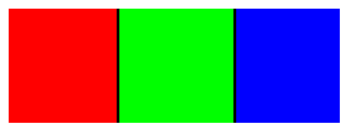

In [5]:
img = cv2.imread(basePath + 'rgb.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#print(img)
plt.imshow(img)
plt.axis('off')

(-0.5, 607.5, 213.5, -0.5)

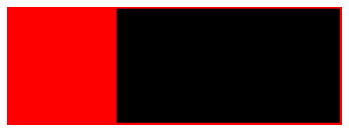

In [6]:
img_t = img.copy()
img_t[:,:,1] = 0
img_t[:,:,2] = 0
plt.imshow(img_t)
plt.axis('off')

# Split Individual Channels

(-0.5, 246.5, 203.5, -0.5)

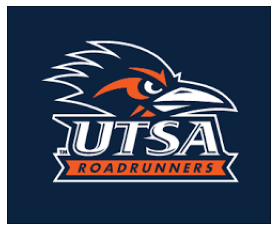

In [7]:
img = cv2.imread(basePath + 'utsa-logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.axis('off')

In [8]:
r,g,b = cv2.split(img)

(-0.5, 246.5, 203.5, -0.5)

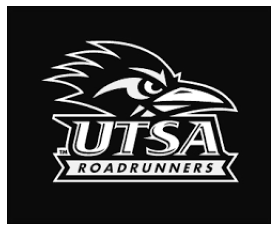

In [9]:
plt.imshow(r, cmap='gray')
plt.axis('off')

(-0.5, 246.5, 203.5, -0.5)

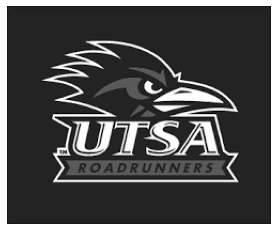

In [10]:
plt.imshow(g, cmap='gray')
plt.axis('off')

(-0.5, 246.5, 203.5, -0.5)

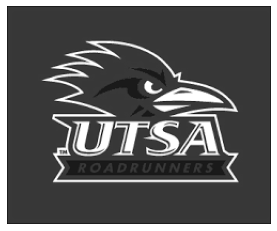

In [11]:
plt.imshow(b, cmap='gray')
plt.axis('off')

# Image as Function

(-0.5, 246.5, 203.5, -0.5)

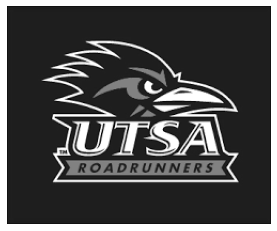

In [12]:
img = cv2.imread(basePath + 'utsa-logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.axis('off')

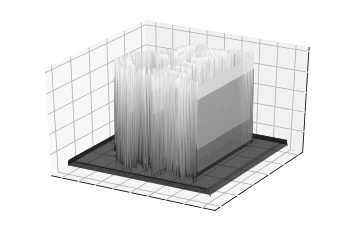

In [13]:
xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]
# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
# show it
plt.show()

In [14]:
# https://plotly.com/python/3d-surface-plots/
fig = go.Figure(data=[go.Surface(z=img)])
fig.show()

# Image Filtering - Point Operations

(-0.5, 296.5, 169.5, -0.5)

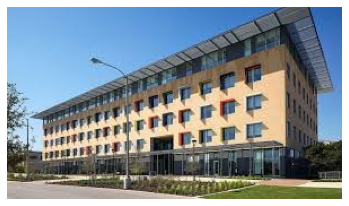

In [15]:
img = cv2.imread(basePath + 'utsa-npb.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

(-0.5, 296.5, 169.5, -0.5)

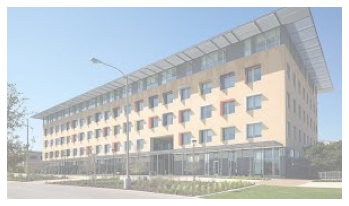

In [16]:
img = cv2.imread(basePath + 'utsa-npb.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
M = np.ones(img.shape, dtype="uint8")
#img = cv2.subtract(M*255,img) #inverse
#img = cv2.multiply(img,M*2) #increase contrast
img = cv2.divide(img,M*2) #decrease contrast
#img = cv2.subtract(img,M*128) #darken
img = cv2.add(img,M*128) #brighten

plt.imshow(img)
plt.axis('off')

# Histogram Equalization

(-0.5, 296.5, 169.5, -0.5)

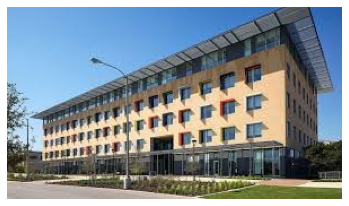

In [17]:
img = cv2.imread(basePath + 'utsa-npb.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

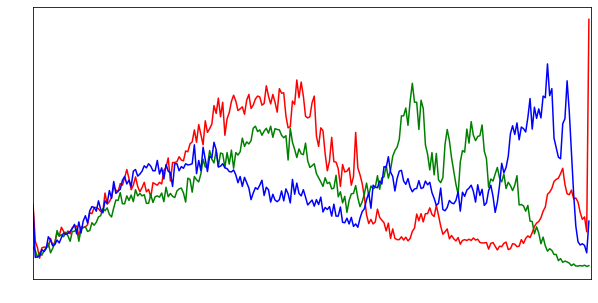

In [18]:
plt.figure(figsize=(10, 5))
for i,col in enumerate(('r','g','b')):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

(-0.5, 296.5, 169.5, -0.5)

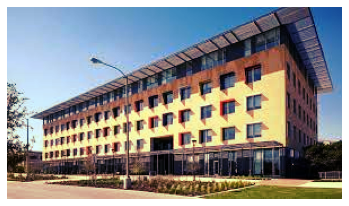

In [19]:
r,g,b = cv2.split(img)
equ_r = cv2.equalizeHist(r)
equ_g = cv2.equalizeHist(g)
equ_b = cv2.equalizeHist(b)
equ = cv2.merge((equ_r,equ_g,equ_b))
plt.imshow(equ)
plt.axis('off')

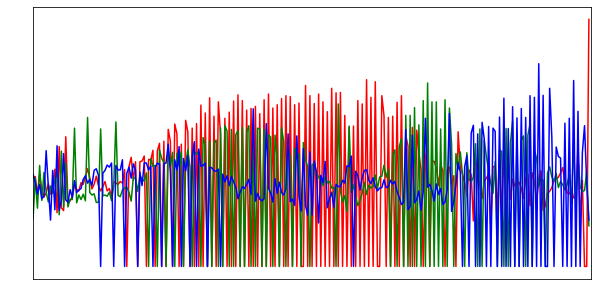

In [20]:
plt.figure(figsize=(10, 5))
for i,col in enumerate(('r','g','b')):
    histr = cv2.calcHist([equ],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()